In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("experimental_data\\raw_data.csv")
compositions = df.iloc[:, df.columns.str.contains("z")]

# Composition sum to 100%
normalize = lambda row: 100 * row / compositions.sum(axis=1)
df.iloc[:, df.columns.str.contains("z")] = compositions.apply(normalize).round(2)
compositions = df.iloc[:, df.columns.str.contains("z")]

print(f"Samples: {df.shape[0]}")
df = df.dropna()
print(f"Samples: {df.shape[0]} [removing NaN]")
df = df[df["LastFluidComponent"] == "C20"]
print(f"Samples: {df.shape[0]} [only LastFluidComponent = C20]")
df = df[~(compositions == 0).any(axis=1)]
print(f"Samples: {df.shape[0]} [only sample w/ all values different from zero]")

df.head()

Samples: 552
Samples: 523 [removing NaN]
Samples: 522 [only LastFluidComponent = C20]
Samples: 473 [only sample w/ all values different from zero]


C:\Users\E5P8\AppData\Local\Temp\ipykernel_35472\2656684610.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~(compositions == 0).any(axis=1)]


,Field,Id,Date,FluidKind,LastFluidMolecularWeight,LastFluidSpecificGravity,zN2,zCO2,zC1,zC2,...,zC12,zC13,zC14,zC15,zC16,zC17,zC18,zC19,zC20,LastFluidComponent
0,Albacora,200588838534569195818022639230611277018,28/11/2013,OLEO,513.0,0.9375,0.28,2.18,50.34,8.80,...,1.39,1.42,1.19,1.12,0.84,0.75,0.74,0.71,7.54,C20
1,Albacora,235655066780487493060135334531738441741,28/11/2013,OLEO,513.0,0.9375,0.28,2.18,50.34,8.80,...,1.39,1.42,1.19,1.12,0.84,0.75,0.74,0.71,7.54,C20
2,Albacora,2850024621782551530469011068396203900,11/12/2014,OLEO,447.0,0.9332,0.36,3.23,45.32,7.16,...,1.35,1.40,1.13,1.07,0.83,0.68,0.74,0.67,10.99,C20
3,Albacora,66820533634321543631617927163864636933,11/12/2014,OLEO,447.0,0.9332,0.36,3.23,45.32,7.16,...,1.35,1.40,1.13,1.07,0.83,0.68,0.74,0.67,10.99,C20
6,Albacora,321567418088616429351396831258924766066,01/08/2007,OLEO,428.0,0.9508,0.01,0.17,42.67,5.08,...,1.44,1.48,1.30,1.30,1.00,0.86,0.84,0.75,24.57,C20


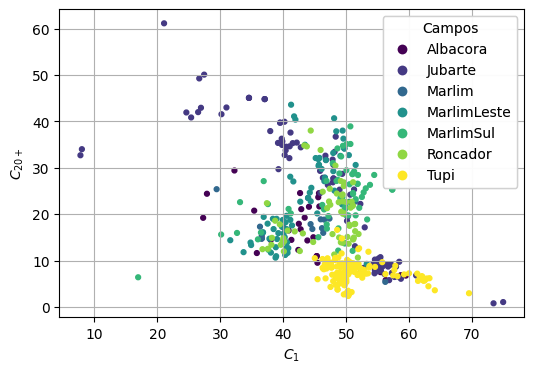

In [3]:
le = LabelEncoder()

fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(
    df["zC1"],
    df["zC20"],
    c=le.fit_transform(df["Field"]),
    s=12,
)
ax.set_xlabel("$C_{1}$")
ax.set_ylabel("$C_{20+}$")
ax.grid(True)
legend1 = ax.legend(
    scatter.legend_elements()[0],
    le.classes_,
    loc="best",
    title="Campos",
)
ax.add_artist(legend1)
plt.show()

In [4]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

for i, (train_idx, test_idx) in enumerate(skf.split(df, df["Field"])):
    train_size = train_idx.shape[0] - test_idx.shape[0]
    train_idx, valid_idx = train_idx[:train_size], train_idx[train_size:]

    df.iloc[train_idx, :].to_csv(f"data\\experimental_train_data_fold={i+1:02d}.csv", index=False)
    df.iloc[valid_idx, :].to_csv(f"data\\experimental_valid_data_fold={i+1:02d}.csv", index=False)
    df.iloc[test_idx, :].to_csv(f"data\\experimental_test_data_fold={i+1:02d}.csv", index=False)